# Feature engineering

## 1. Load the dataset (train and test separately)
## 2. Column Name: Create new feature Title
## 3. Column Cabin : Create new features Cabin_letter and Num_Cabs
## 4. Column Ticket : Create new feature Ticket_letters
## 5. Column SibSp and Parch : Create new feature TravelGroup
## 6. Encoding (pandas: dummy)
## 7. Save dataframe

### Load python modules


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",101)

## 1. Load the dataset (train and test separately)

In [2]:
train_data = './data/train.ETL.001.csv'
test_data = './data/test.ETL.001.csv'
df_train = pd.read_csv(train_data, index_col=0)
df_test = pd.read_csv(test_data, index_col=0)

In [3]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  missing        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  missing        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  missing        S

In [4]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare    Cabin Embarked  
0  34.5      0      0   330911   7.8292  missing        Q  
1  47.0      1      0   363272   7.0000  missing        S  
2  62.0      0      0   240276   9.6875  missing        Q  
3  27.0      0      0   315154   8.6625  missing        S  
4  22.0      1      1  3101298  12.2875  missing        S

In [5]:
df_test.count()  # check for missing values

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

## 2. Column Name: Create new feature Title

As seen in the data exploration step, one can take the title in the name column as another feature. One needs to write a function to extract the name first. What titles are there? All titles have a . at the end.

In [6]:
def new_feature_title(row):
    # print(row['Name'])
    title = re.findall(r'\, (.*?)\.', row['Name'])[0]
    return title
    
df_train['Title'] = df_train.apply(lambda x: new_feature_title(x), axis = 1)
df_test['Title'] = df_test.apply(lambda x: new_feature_title(x), axis = 1)

In [7]:
df_train['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [8]:
df_test['Title'].unique().tolist()

['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

In [9]:
df_train[df_train.Name.str.contains('Jonkheer')]

PassengerId  Survived  Pclass                             Name   Sex  \
822          823         0       1  Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch Ticket  Fare    Cabin Embarked     Title  
822  38.0      0      0  19972   0.0  missing        S  Jonkheer

The test set contains fewer titles compared to the training set. But all of the titles in the test set are in the training set. If the length is 891, that means all the titles in the test set are in the training set.

In [10]:
df_train['Title'].isin(df_test['Title']).count()  

891

## 3. Column Cabin : Create new features Cabin_letter and Num_Cabs

In [11]:
df_train[df_train.Cabin.str.contains('F', na=False)]

PassengerId  Survived  Pclass  \
66            67         1       2   
75            76         0       3   
128          129         1       3   
148          149         0       2   
183          184         1       2   
193          194         1       2   
340          341         1       2   
345          346         1       2   
516          517         1       2   
618          619         1       2   
699          700         0       3   
715          716         0       3   
776          777         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
66                 Nye, Mrs. (Elizabeth Ramell)  female  29.0      0      0   
75                      Moen, Mr. Sigurd Hansen    male  25.0      0      0   
128                           Peter, Miss. Anna  female  21.5      1      1   
148    Navratil, Mr. Michel ("Louis M Hoffman")    male  36.5      0      2   
183                   Becker, Master. Richard F    male   1.0      2      1   
193                  Navratil, Master. Michel M    male   3.0      1      1   
340              Navratil, Master. Edmond Roger    male   2.0      1      1   
345               Brown, Miss. Amelia "Mildred"  female  24.0      0      0   
516                Lemore, Mrs. (Amelia Milley)  female  34.0      0      0   
618                 Becker, Miss. Marion Louise  female   4.0      2      1   
699    Humblen, Mr. Adolf Mathias Nicolai Olsen    male  42.0      0      0   
715  Soholt, Mr. Peter Andreas Lauritz Andersen    male  19.0      0      0   
776                            Tobin, Mr. Roger    male  25.0      0      0   

         Ticket     Fare  Cabin Embarked   Title  
66   C.A. 29395  10.5000    F33        S     Mrs  
75       348123   7.6500  F G73        S      Mr  
128        2668  22.3583  F E69        C    Miss  
148      230080  26.0000     F2        S      Mr  
183      230136  39.0000     F4        S  Master  
193      230080  26.0000     F2        S  Master  
340      230080  26.0000     F2        S  Master  
345      248733  13.0000    F33        S    Miss  
516  C.A. 34260  10.5000    F33        S     Mrs  
618      230136  39.0000     F4        S    Miss  
699      348121   7.6500  F G63        S      Mr  
715      348124   7.6500  F G73        S      Mr  
776      383121   7.7500    F38        Q      Mr

In [12]:
def new_feature_num_cabins(row):
    r = row['Cabin']
    t_ = re.findall(r'(\w\d\d)', r)
#     if len(t_) > 1:
#         print(t_)
    return len(t_)
    
df_train['Num_cabins'] = df_train.apply(lambda x: new_feature_num_cabins(x), axis=1)
df_train[df_train.Num_cabins > 1]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
97            98         1       1   
118          119         0       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
341          342         1       1   
390          391         1       1   
435          436         1       1   
438          439         0       1   
498          499         0       1   
679          680         1       1   
700          701         1       1   
742          743         1       1   
763          764         1       1   
789          790         0       1   
802          803         1       1   
872          873         0       1   

                                                  Name     Sex    Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.00      3   
88                          Fortune, Miss. Mabel Helen  female  23.00      3   
97                     Greenfield, Mr. William Bertram    male  23.00      0   
118                           Baxter, Mr. Quigg Edmond    male  24.00      0   
297                       Allison, Miss. Helen Loraine  female   2.00      1   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.00      0   
305                     Allison, Master. Hudson Trevor    male   0.92      1   
311                         Ryerson, Miss. Emily Borie  female  18.00      2   
341                     Fortune, Miss. Alice Elizabeth  female  24.00      3   
390                         Carter, Mr. William Ernest    male  36.00      1   
435                          Carter, Miss. Lucile Polk  female  14.00      1   
438                                  Fortune, Mr. Mark    male  64.00      1   
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00      1   
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.00      0   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.00      1   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.00      2   
763          Carter, Mrs. William Ernest (Lucile Polk)  female  36.00      1   
789                           Guggenheim, Mr. Benjamin    male  46.00      0   
802                Carter, Master. William Thornton II    male  11.00      1   
872                           Carlsson, Mr. Frans Olof    male  33.00      0   

     Parch    Ticket      Fare            Cabin Embarked   Title  Num_cabins  
27       2     19950  263.0000      C23 C25 C27        S      Mr           3  
88       2     19950  263.0000      C23 C25 C27        S    Miss           3  
97       1  PC 17759   63.3583          D10 D12        C      Mr           2  
118      1  PC 17558  247.5208          B58 B60        C      Mr           2  
297      2    113781  151.5500          C22 C26        S    Miss           2  
299      1  PC 17558  247.5208          B58 B60        C     Mrs           2  
305      2    113781  151.5500          C22 C26        S  Master           2  
311      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4  
341      2     19950  263.0000      C23 C25 C27        S    Miss           3  
390      2    113760  120.0000          B96 B98        S      Mr           2  
435      2    113760  120.0000          B96 B98        S    Miss           2  
438      4     19950  263.0000      C23 C25 C27        S      Mr           3  
498      2    113781  151.5500          C22 C26        S     Mrs           2  
679      1  PC 17755  512.3292      B51 B53 B55        C      Mr           3  
700      0  PC 17757  227.5250          C62 C64        C     Mrs           2  
742      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4  
763      2    113760  120.0000          B96 B98        S     Mrs           2  
789      0  PC 17593   79.2000          B82 B84        C      Mr           2  
802      2    113760  12

In [13]:
df_test['Num_cabins'] = df_test.apply(lambda x: new_feature_num_cabins(x), axis=1)
df_train[df_train.Num_cabins > 1]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
97            98         1       1   
118          119         0       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
341          342         1       1   
390          391         1       1   
435          436         1       1   
438          439         0       1   
498          499         0       1   
679          680         1       1   
700          701         1       1   
742          743         1       1   
763          764         1       1   
789          790         0       1   
802          803         1       1   
872          873         0       1   

                                                  Name     Sex    Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.00      3   
88                          Fortune, Miss. Mabel Helen  female  23.00      3   
97                     Greenfield, Mr. William Bertram    male  23.00      0   
118                           Baxter, Mr. Quigg Edmond    male  24.00      0   
297                       Allison, Miss. Helen Loraine  female   2.00      1   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.00      0   
305                     Allison, Master. Hudson Trevor    male   0.92      1   
311                         Ryerson, Miss. Emily Borie  female  18.00      2   
341                     Fortune, Miss. Alice Elizabeth  female  24.00      3   
390                         Carter, Mr. William Ernest    male  36.00      1   
435                          Carter, Miss. Lucile Polk  female  14.00      1   
438                                  Fortune, Mr. Mark    male  64.00      1   
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00      1   
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.00      0   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.00      1   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.00      2   
763          Carter, Mrs. William Ernest (Lucile Polk)  female  36.00      1   
789                           Guggenheim, Mr. Benjamin    male  46.00      0   
802                Carter, Master. William Thornton II    male  11.00      1   
872                           Carlsson, Mr. Frans Olof    male  33.00      0   

     Parch    Ticket      Fare            Cabin Embarked   Title  Num_cabins  
27       2     19950  263.0000      C23 C25 C27        S      Mr           3  
88       2     19950  263.0000      C23 C25 C27        S    Miss           3  
97       1  PC 17759   63.3583          D10 D12        C      Mr           2  
118      1  PC 17558  247.5208          B58 B60        C      Mr           2  
297      2    113781  151.5500          C22 C26        S    Miss           2  
299      1  PC 17558  247.5208          B58 B60        C     Mrs           2  
305      2    113781  151.5500          C22 C26        S  Master           2  
311      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4  
341      2     19950  263.0000      C23 C25 C27        S    Miss           3  
390      2    113760  120.0000          B96 B98        S      Mr           2  
435      2    113760  120.0000          B96 B98        S    Miss           2  
438      4     19950  263.0000      C23 C25 C27        S      Mr           3  
498      2    113781  151.5500          C22 C26        S     Mrs           2  
679      1  PC 17755  512.3292      B51 B53 B55        C      Mr           3  
700      0  PC 17757  227.5250          C62 C64        C     Mrs           2  
742      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4  
763      2    113760  120.0000          B96 B98        S     Mrs           2  
789      0  PC 17593   79.2000          B82 B84        C      Mr           2  
802      2    113760  12

In [14]:
def new_feature_cabin_letter(row):
    r = row['Cabin']
    if not r == 'missing':
        t_ = re.findall(r'(.*?)\d', r)
    #     if len(t_) > 1:
    #         print(t_)
        return t_[0]
    else:
        return 'missing'
    
df_train['Cabin_letter'] = df_train.apply(lambda x: new_feature_cabin_letter(x), axis=1)
df_test['Cabin_letter'] = df_test.apply(lambda x: new_feature_cabin_letter(x), axis=1)
df_train[df_train.Num_cabins > 1]

PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
97            98         1       1   
118          119         0       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
341          342         1       1   
390          391         1       1   
435          436         1       1   
438          439         0       1   
498          499         0       1   
679          680         1       1   
700          701         1       1   
742          743         1       1   
763          764         1       1   
789          790         0       1   
802          803         1       1   
872          873         0       1   

                                                  Name     Sex    Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.00      3   
88                          Fortune, Miss. Mabel Helen  female  23.00      3   
97                     Greenfield, Mr. William Bertram    male  23.00      0   
118                           Baxter, Mr. Quigg Edmond    male  24.00      0   
297                       Allison, Miss. Helen Loraine  female   2.00      1   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.00      0   
305                     Allison, Master. Hudson Trevor    male   0.92      1   
311                         Ryerson, Miss. Emily Borie  female  18.00      2   
341                     Fortune, Miss. Alice Elizabeth  female  24.00      3   
390                         Carter, Mr. William Ernest    male  36.00      1   
435                          Carter, Miss. Lucile Polk  female  14.00      1   
438                                  Fortune, Mr. Mark    male  64.00      1   
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00      1   
679                 Cardeza, Mr. Thomas Drake Martinez    male  36.00      0   
700  Astor, Mrs. John Jacob (Madeleine Talmadge Force)  female  18.00      1   
742              Ryerson, Miss. Susan Parker "Suzette"  female  21.00      2   
763          Carter, Mrs. William Ernest (Lucile Polk)  female  36.00      1   
789                           Guggenheim, Mr. Benjamin    male  46.00      0   
802                Carter, Master. William Thornton II    male  11.00      1   
872                           Carlsson, Mr. Frans Olof    male  33.00      0   

     Parch    Ticket      Fare            Cabin Embarked   Title  Num_cabins  \
27       2     19950  263.0000      C23 C25 C27        S      Mr           3   
88       2     19950  263.0000      C23 C25 C27        S    Miss           3   
97       1  PC 17759   63.3583          D10 D12        C      Mr           2   
118      1  PC 17558  247.5208          B58 B60        C      Mr           2   
297      2    113781  151.5500          C22 C26        S    Miss           2   
299      1  PC 17558  247.5208          B58 B60        C     Mrs           2   
305      2    113781  151.5500          C22 C26        S  Master           2   
311      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4   
341      2     19950  263.0000      C23 C25 C27        S    Miss           3   
390      2    113760  120.0000          B96 B98        S      Mr           2   
435      2    113760  120.0000          B96 B98        S    Miss           2   
438      4     19950  263.0000      C23 C25 C27        S      Mr           3   
498      2    113781  151.5500          C22 C26        S     Mrs           2   
679      1  PC 17755  512.3292      B51 B53 B55        C      Mr           3   
700      0  PC 17757  227.5250          C62 C64        C     Mrs           2   
742      2  PC 17608  262.3750  B57 B59 B63 B66        C    Miss           4   
763      2    113760  120.0000          B96 B98        S     Mrs           2   
789      0  PC 17593   79.2000          B82 B84        C      Mr           2   
802  

## 4. Column Ticket : Create new feature Ticket_letters

As seen in data exploration, some tickets have some letters before the ticket, others only have digits. Might be useful as a feature.

Assumption:

- only the letters before the / are relevant until the .
- decision to remove letters LP and AQ from the test set, because those letters are not in the training set

In [15]:
def unique_letters(row):
    pat = re.findall(r'([^\d]+)\d', row) # match only those that contains letters before digits
    if len(pat) > 0:
        pat = re.findall(r'([^\/]+)', pat[0]) # stop at / 
        pat = [s.replace('.', '') for s in pat] # remove .
        return pat[0].strip() # remove whitespace
    return 'digits'  # not a letter

df_train['Ticket_letters'] = df_train['Ticket'].apply(lambda x: unique_letters(x))
df_test['Ticket_letters'] = df_test['Ticket'].apply(lambda x: unique_letters(x))
df_train['Ticket_letters'].unique()

array(['A', 'PC', 'STON', 'digits', 'PP', 'CA', 'SC', 'SP', 'SOC', 'SO',
       'W', 'SOTON', 'WEP', 'C', 'SOP', 'Fa', 'FCC', 'SW', 'SCO', 'P',
       'WE', 'FC'], dtype=object)

In [16]:
df_test['Ticket_letters'].unique()

array(['digits', 'A', 'WEP', 'SC', 'STON', 'PC', 'C', 'CA', 'W', 'SOTON',
       'FCC', 'FC', 'PP', 'SO', 'SOC', 'AQ', 'LP'], dtype=object)

In [17]:
letters_test_set = df_test['Ticket_letters'].unique().tolist()

In [18]:
for letter in letters_test_set:
    my_sum = (df_train['Ticket_letters'].isin([letter]).sum())
    if my_sum == 0:
        print(f'Letter {letter} is in the test set but not in the dataset!')

Letter AQ is in the test set but not in the dataset!
Letter LP is in the test set but not in the dataset!


In [19]:
df_test[df_test.Ticket.str.contains('AQ')]

PassengerId  Pclass                  Name     Sex   Age  SibSp  Parch  \
256         1148       3       Mahon, Mr. John    male  24.0      0      0   
315         1207       3  Hagardon, Miss. Kate  female  17.0      0      0   

          Ticket    Fare    Cabin Embarked Title  Num_cabins Cabin_letter  \
256    AQ/4 3130  7.7500  missing        Q    Mr           0      missing   
315  AQ/3. 30631  7.7333  missing        Q  Miss           0      missing   

    Ticket_letters  
256             AQ  
315             AQ

In [20]:
df_test[df_test.Ticket.str.contains('LP')]

PassengerId  Pclass                 Name   Sex   Age  SibSp  Parch  \
312         1204       3  Sadowitz, Mr. Harry  male  24.0      0      0   

      Ticket   Fare    Cabin Embarked Title  Num_cabins Cabin_letter  \
312  LP 1588  7.575  missing        S    Mr           0      missing   

    Ticket_letters  
312             LP

In [21]:
forbidden_letters= ['AQ', 'LP']

def new_feature_ticket_letters(row):
    pat = re.findall(r'([^\d]+)\d', row['Ticket']) # match only those that contains letters before digits
    if len(pat) > 0:
        pat = re.findall(r'([^\/]+)', pat[0]) # stop at / 
        pat = [s.replace('.', '') for s in pat] # remove .
        res = pat[0].strip() # remove whitespace
        if res in forbidden_letters:
            return 'missing'
        else:
            return res
    return 'digits'  # not a letter

df_train['Ticket_letters'] = df_train.apply(lambda x: new_feature_ticket_letters(x), axis=1)
df_test['Ticket_letters'] = df_test.apply(lambda x: new_feature_ticket_letters(x), axis=1)
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title  Num_cabins  \
0      0         A/5 21171   7.2500  missing        S    Mr           0   
1      0          PC 17599  71.2833      C85        C   Mrs           1   
2      0  STON/O2. 3101282   7.9250  missing        S  Miss           0   
3      0            113803  53.1000     C123        S   Mrs           1   
4      0            373450   8.0500  missing        S    Mr           0   

  Cabin_letter Ticket_letters  
0      missing              A  
1            C             PC  
2      missing           STON  
3            C         digits  
4      missing         digits

In [22]:
df_test[df_test.Ticket_letters.str.contains('miss')]

PassengerId  Pclass                  Name     Sex   Age  SibSp  Parch  \
256         1148       3       Mahon, Mr. John    male  24.0      0      0   
312         1204       3   Sadowitz, Mr. Harry    male  24.0      0      0   
315         1207       3  Hagardon, Miss. Kate  female  17.0      0      0   

          Ticket    Fare    Cabin Embarked Title  Num_cabins Cabin_letter  \
256    AQ/4 3130  7.7500  missing        Q    Mr           0      missing   
312      LP 1588  7.5750  missing        S    Mr           0      missing   
315  AQ/3. 30631  7.7333  missing        Q  Miss           0      missing   

    Ticket_letters  
256        missing  
312        missing  
315        missing

In [23]:
df_train[df_train.Ticket_letters.str.contains('miss')]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Num_cabins, Cabin_letter, Ticket_letters]
Index: []

## 5. Column SibSp and Parch: Create new feature TravelGroup

Feature to indciate the number of passengers that travel in a group, i.e. the number of siblings/spouses or parents with that passenger. This is created very simplistic, taking only the sum of number of siblings/spouses and parents with that passenger. 

Looking at the histogram, it is not a good idea to use continuous values, instead one can categorize the travel group into four classes:

- Alone: Passenger travels not in a group
- Duo: Passengers travel in a group of 2 (1 including passenger)
- GroupSmall: Passengers travel in a group of size between 3 and 4 (2, 3 including passenger)
- GroupLarge: Passengers travel in a group of size larger than 5 (4 including passenger)

In [24]:
def feature_travelgroup(row):
    return (row['SibSp'] + row['Parch'])

df_train['TravelGroup'] = df_train.apply(lambda x: feature_travelgroup(x), axis=1)
df_test['TravelGroup'] = df_test.apply(lambda x: feature_travelgroup(x), axis=1)


print(np.max(df_train.TravelGroup))
print(np.max(df_test.TravelGroup))

10
10


Text(0,0.5,'Counts')

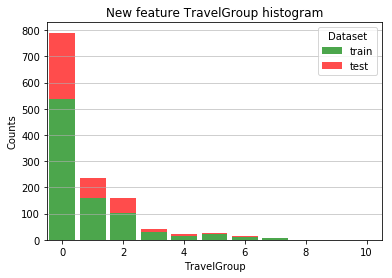

In [25]:
# Quick check on the histogram
plt.figure()
plt.title('New feature TravelGroup histogram')
bins = np.arange(0,10+1,1)-0.5
plt.xlim(-0.5,10.5)
Y = [df_train['TravelGroup'].values, df_test['TravelGroup'].values]
color = ['green', 'red']
label = ['train', 'test']
n, bins, patches = plt.hist(x=Y, stacked=True, color=color, bins=bins, alpha=0.7, rwidth=0.85, density=False, label=label)
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Dataset')
plt.xlabel('TravelGroup')
plt.ylabel('Counts')


# plt.figure()

In [26]:
def new_feature_travelgroup(row):
    n = (row['SibSp'] + row['Parch'])
    if n == 0:
        return 'Alone'
    if (n == 1):
        return 'Duo'
    if (n > 1) & (n < 4):
        return 'GroupSmall'
    if (n > 4):
        return 'GroupLarge'

df_train['TravelGroup'] = df_train.apply(lambda x: new_feature_travelgroup(x), axis=1)
df_test['TravelGroup'] = df_test.apply(lambda x: new_feature_travelgroup(x), axis=1)

In [27]:
df_test[df_test['TravelGroup'].str.contains('Alone', na=False)].head()

PassengerId  Pclass                        Name     Sex   Age  SibSp  \
0          892       3            Kelly, Mr. James    male  34.5      0   
2          894       2   Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3            Wirz, Mr. Albert    male  27.0      0   
5          897       3  Svensson, Mr. Johan Cervin    male  14.0      0   
6          898       3        Connolly, Miss. Kate  female  30.0      0   

   Parch  Ticket    Fare    Cabin Embarked Title  Num_cabins Cabin_letter  \
0      0  330911  7.8292  missing        Q    Mr           0      missing   
2      0  240276  9.6875  missing        Q    Mr           0      missing   
3      0  315154  8.6625  missing        S    Mr           0      missing   
5      0    7538  9.2250  missing        S    Mr           0      missing   
6      0  330972  7.6292  missing        Q  Miss           0      missing   

  Ticket_letters TravelGroup  
0         digits       Alone  
2         digits       Alone  
3         digits       Alone  
5         digits       Alone  
6         digits       Alone

In [28]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare    Cabin Embarked Title  Num_cabins  \
0  34.5      0      0   330911   7.8292  missing        Q    Mr           0   
1  47.0      1      0   363272   7.0000  missing        S   Mrs           0   
2  62.0      0      0   240276   9.6875  missing        Q    Mr           0   
3  27.0      0      0   315154   8.6625  missing        S    Mr           0   
4  22.0      1      1  3101298  12.2875  missing        S   Mrs           0   

  Cabin_letter Ticket_letters TravelGroup  
0      missing         digits       Alone  
1      missing         digits         Duo  
2      missing         digits       Alone  
3      missing         digits       Alone  
4      missing         digits  GroupSmall

## 6. Encoding (pandas: dummy)

The following columns will be used for modeling:

- PassengerId
- Survived (training set only)
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Cabin_letter
- Embarked
- Title
- Num_cabins
- Ticket_letters
- TravelGroup

Out of those the following need encoding:

- Pclass
- Sex
- Cabin_letter
- Embarked
- Title
- Ticket_letters
- TravelGroup


In [29]:
df_orig_test = df_test
df_orig_train = df_train

def my_dummy(df, colname):
    df_dummy = pd.get_dummies(df[colname], prefix=colname)  # dummy encoding
    df = pd.concat([df, df_dummy], axis=1)  # combine the dfs
    df = df.drop(colname, axis=1) # remove the original column
    return df

cols_encoding = [
    'Pclass',
    'Sex',
    'Cabin_letter',
    'Embarked',
    'Title',
    'Ticket_letters',
    'TravelGroup'
]

for col in cols_encoding:
    df_train = my_dummy(df_train, col)
    df_test = my_dummy(df_test, col)    

cols_to_remove = [
    'Name',
    'Ticket',
    'Cabin'
]

for col in cols_to_remove:
    df_train = df_train.drop(col, axis=1)
    df_test = df_test.drop(col, axis=1)



In [30]:
cols_train = df_train.columns.tolist()

In [31]:
cols_test = df_test.columns.tolist()

### Treatment of missing columns in the test set compared to the training set

In [32]:
cols_to_add = []
for item in cols_train:
    if (not item in cols_test):
        print(f'{item} is not in the test dataframe!')
        if item == 'Survived':
            pass
        else:
            print(f'Adding {item} column to the test dataframe!')
            df_test[item] = 0
        
print(len(df_test.columns))
print(len(df_train.columns))

Survived is not in the test dataframe!
Embarked_missing is not in the test dataframe!
Adding Embarked_missing column to the test dataframe!
Title_Capt is not in the test dataframe!
Adding Title_Capt column to the test dataframe!
Title_Don is not in the test dataframe!
Adding Title_Don column to the test dataframe!
Title_Jonkheer is not in the test dataframe!
Adding Title_Jonkheer column to the test dataframe!
Title_Lady is not in the test dataframe!
Adding Title_Lady column to the test dataframe!
Title_Major is not in the test dataframe!
Adding Title_Major column to the test dataframe!
Title_Mlle is not in the test dataframe!
Adding Title_Mlle column to the test dataframe!
Title_Mme is not in the test dataframe!
Adding Title_Mme column to the test dataframe!
Title_Sir is not in the test dataframe!
Adding Title_Sir column to the test dataframe!
Title_the Countess is not in the test dataframe!
Adding Title_the Countess column to the test dataframe!
Ticket_letters_Fa is not in the test da

In [33]:
df_test.sample(10)

PassengerId   Age  SibSp  Parch      Fare  Num_cabins  Pclass_1  \
385         1277  24.0      1      2   65.0000           0         0   
322         1214  26.0      0      0   13.0000           0         0   
341         1233  32.0      0      0    7.5792           0         0   
312         1204  24.0      0      0    7.5750           0         0   
81           973  67.0      1      0  221.7792           2         1   
367         1259  22.0      0      0   39.6875           0         0   
184         1076  27.0      1      1  247.5208           2         1   
133         1025  24.0      1      0    6.4375           0         0   
337         1229  39.0      0      2    7.2292           0         0   
222         1114  22.0      0      0   10.5000           1         0   

     Pclass_2  Pclass_3  Sex_female  Sex_male  Cabin_letter_A  Cabin_letter_B  \
385         1         0           1         0               0               0   
322         1         0           0         1               0               0   
341         0         1           0         1               0               0   
312         0         1           0         1               0               0   
81          0         0           0         1               0               0   
367         0         1           1         0               0               0   
184         0         0           1         0               0               1   
133         0         1           0         1               0               0   
337         0         1           0         1               0               0   
222         1         0           1         0               0               0   

     Cabin_letter_C  Cabin_letter_D  Cabin_letter_E  Cabin_letter_F  \
385               0               0               0               0   
322               0               0               0               1   
341               0               0               0               0   
312               0               0               0               0   
81                1               0               0               0   
367               0               0               0               0   
184               0               0               0               0   
133               0               0               0               0   
337               0               0               0               0   
222               0               0               0               1   

     Cabin_letter_F E  Cabin_letter_F G  Cabin_letter_G  Cabin_letter_missing  \
385                 0                 0               0                     1   
322                 0                 0               0                     0   
341                 0                 0               0                     1   
312                 0                 0               0                     1   
81                  0                 0               0                     0   
367                 0                 0               0                     1   
184                 0                 0               0                     0   
133                 0                 0               0                     1   
337                 0                 0               0                     1   
222                 0                 0               0                     0   

     Embarked_C  Embarked_Q  Embarked_S  Title_Col  Title_Dona  Title_Dr  \
385           0           0           1          0           0         0   
322           0           0           1          0           0         0   
341           0           0           1          0           0         0   
312           0           0           1          0           0         0   
81            0           0           1          0           0         0   
367           0           0           1          0           0         0   
184           1           0           0          0           0         0   
133           1           0           

## 7. Save dataframe

In [34]:
train_data = './data/train.feature_eng.001.csv'
test_data = './data/test.feature_eng.001.csv'
df_train.to_csv(train_data)
df_test.to_csv(test_data)